In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
import healpy as hp
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

Import data

- First, Velhola catalog

In [17]:
Velhola_dat = fits.open('Dwarfs_Velhola.fit')
#Velhola_dat[1].header.keys
# ============================================
ra_velh = Velhola_dat[1].data["RA_ICRS"]
dec_velh = Velhola_dat[1].data["DE_ICRS"]

- Now, let's import the GOLD catalog around Fornax

In [18]:
DES_dat = fits.open('Big_Fornax.fits')

ra_all = DES_dat[1].data['RA']
dec_all = DES_dat[1].data['DEC']
A_IMAGE = DES_dat[1].data['A_IMAGE']
B_IMAGE = DES_dat[1].data['B_IMAGE']
MAG_AUTO_G = DES_dat[1].data['MAG_AUTO_G']
FLUX_RADIUS_G = 0.263*DES_dat[1].data['FLUX_RADIUS_G']
MU_EFF_MODEL_G = DES_dat[1].data['MU_EFF_MODEL_G']
MU_MAX_G = DES_dat[1].data['MU_MAX_G']
MU_MAX_MODEL_G = DES_dat[1].data['MU_MAX_MODEL_G']
MU_MEAN_MODEL_G = DES_dat[1].data['MU_MEAN_MODEL_G']
MAG_AUTO_R = DES_dat[1].data['MAG_AUTO_R']
FLUX_RADIUS_R = 0.263*DES_dat[1].data['FLUX_RADIUS_R']
MU_EFF_MODEL_R = DES_dat[1].data['MU_EFF_MODEL_R']
MU_MAX_R = DES_dat[1].data['MU_MAX_R']
MU_MAX_MODEL_R = DES_dat[1].data['MU_MAX_MODEL_R']
MU_MEAN_MODEL_R = DES_dat[1].data['MU_MEAN_MODEL_R']
MAG_AUTO_I = DES_dat[1].data['MAG_AUTO_I']
FLUX_RADIUS_I = 0.263*DES_dat[1].data['FLUX_RADIUS_I']
MU_EFF_MODEL_I = DES_dat[1].data['MU_EFF_MODEL_I']
MU_MAX_I = DES_dat[1].data['MU_MAX_I']
MU_MAX_MODEL_I = DES_dat[1].data['MU_MAX_MODEL_I']
MU_MEAN_MODEL_I = DES_dat[1].data['MU_MEAN_MODEL_I']
SPREADERR_MODEL_I = DES_dat[1].data['SPREADERR_MODEL_I']
SPREAD_MODEL_I = DES_dat[1].data['SPREAD_MODEL_I']

# Perform the star-galaxy separation cut
gal_star_cut = (SPREAD_MODEL_I+ (5./3.0)*SPREADERR_MODEL_I  > 0.007)

ra_all = ra_all[gal_star_cut]
dec_all = dec_all[gal_star_cut]
A_IMAGE = A_IMAGE[gal_star_cut]
B_IMAGE = B_IMAGE[gal_star_cut]
MAG_AUTO_G = MAG_AUTO_G[gal_star_cut]
FLUX_RADIUS_G = FLUX_RADIUS_G[gal_star_cut]
MU_EFF_MODEL_G = MU_EFF_MODEL_G[gal_star_cut]
MU_MAX_MODEL_G = MU_MAX_MODEL_G[gal_star_cut]
MU_MAX_G = MU_MAX_G[gal_star_cut]
MU_MEAN_MODEL_G = MU_MEAN_MODEL_G[gal_star_cut]
MAG_AUTO_R = MAG_AUTO_R[gal_star_cut]
FLUX_RADIUS_R = FLUX_RADIUS_R[gal_star_cut] 
MU_EFF_MODEL_R = MU_EFF_MODEL_R[gal_star_cut]
MU_MAX_R = MU_MAX_R[gal_star_cut]
MU_MAX_MODEL_R = MU_MAX_MODEL_R[gal_star_cut]
MU_MEAN_MODEL_R = MU_MEAN_MODEL_R[gal_star_cut]
MAG_AUTO_I = MAG_AUTO_I[gal_star_cut]
FLUX_RADIUS_I = FLUX_RADIUS_I[gal_star_cut]
MU_EFF_MODEL_I = MU_EFF_MODEL_I[gal_star_cut]
MU_MAX_I = MU_MAX_I[gal_star_cut] 
MU_MAX_MODEL_I = MU_MAX_MODEL_I[gal_star_cut]
MU_MEAN_MODEL_I = MU_MEAN_MODEL_I[gal_star_cut]

# Define the ellipticity now
ellipticity = 1.0 - B_IMAGE/A_IMAGE

print(len(ra_all))

3222178


- Now the LSBG sample

In [19]:
LSBG_df = pd.read_csv('LSBG_sample.csv')

#LSBG_df.head()

coadd_object_id = LSBG_df['Coadd_id'].values

# Coordinates
RA_LSB = LSBG_df['RA'].values
DEC_LSB = LSBG_df['DEC'].values
# A, B image
A_IMAGE = LSBG_df['A_IMAGE'].values
B_IMAGE = LSBG_df['B_IMAGE'].values
# Effective radius 
R_eff = LSBG_df['R_eff_g'].values
R_eff_err = LSBG_df['R_eff_err_g'].values
# Sersic index
n_ser = LSBG_df['n_ser'].values
n_ser_err = LSBG_df['n_ser_err'].values
# Auto Magnitudes
mag_g_auto = LSBG_df['mag_auto_g'].values
mag_r_auto = LSBG_df['mag_auto_r'].values
mag_i_auto = LSBG_df['mag_auto_i'].values
# Magnitudes
mag_g = LSBG_df['mag_g'].values
mag_r = LSBG_df['mag_r'].values
mag_i = LSBG_df['mag_i'].values
# Errors on magnitudes 
#mag_g_err = Galfit_res[1].data["MAG_ERR_G"]
#mag_r_err = Galfit_res[1].data["MAG_ERR_R"]
#mag_i_err = Galfit_res[1].data["MAG_ERR_I"]

for i in range(len(RA_LSB)):
    if (RA_LSB[i] > 150.):
        RA_LSB[i] = RA_LSB[i]-360.
        


Let's plot them to see

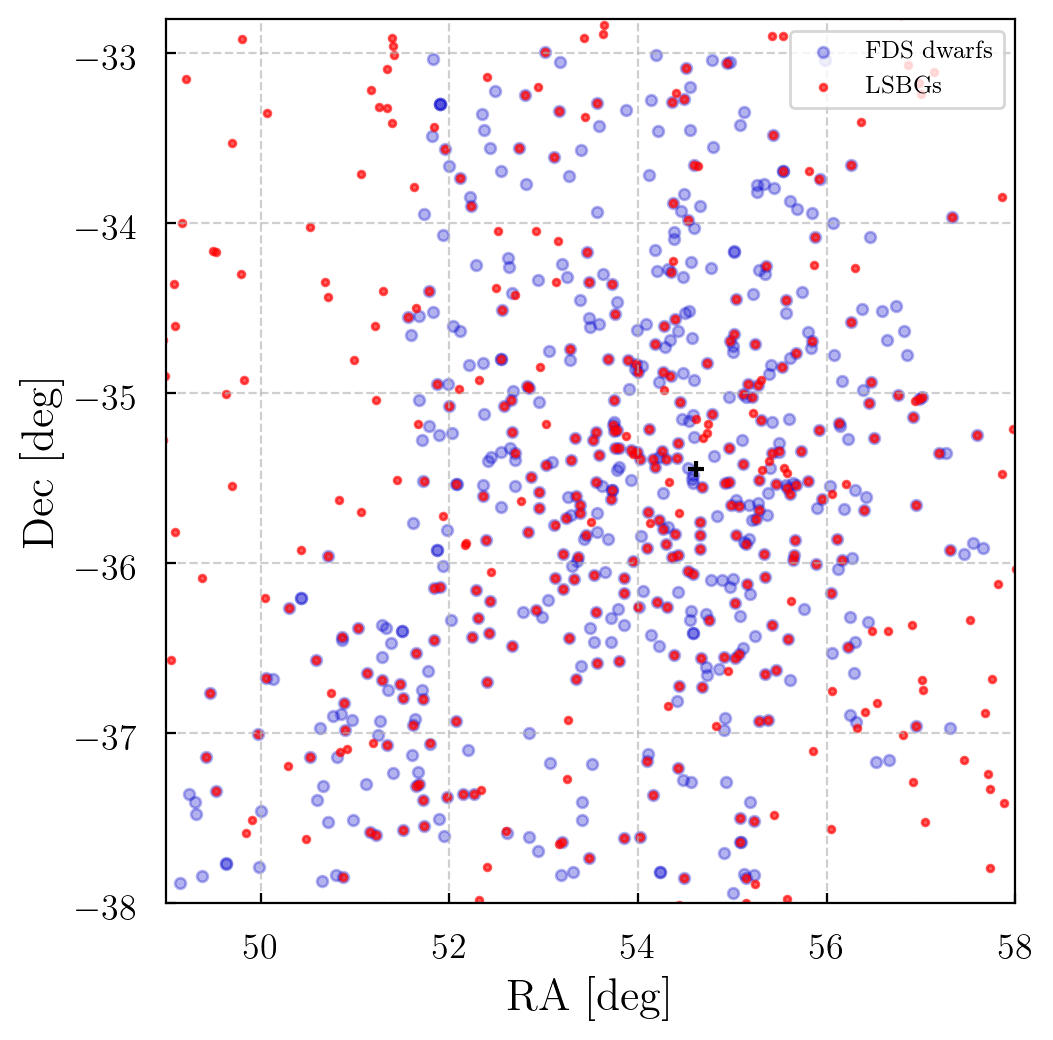

In [24]:
plot_pretty()
plt.figure(figsize=(5.35,5.3))

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

plt.scatter(ra_velh, dec_velh, marker='o',s=15,color='mediumblue',alpha=0.3, label='FDS dwarfs')
#plt.scatter(ra_all, dec_all, marker='o',s=0.1,color='mediumblue',alpha=0.3, label='FDS dwarfs')

plt.scatter(RA_LSB, DEC_LSB, s=6.0, color='red', alpha=0.65, label='LSBGs')
plt.scatter(54.6162,-35.4483, s=33, marker='+', color='k')

plt.grid(ls='--',alpha=0.6)

plt.xlabel('RA [deg]', fontsize=16)
plt.ylabel('Dec [deg]', fontsize=16)

plt.legend(frameon=True,loc='upper right', fontsize=8.5)

plt.xlim(49,58)
plt.ylim(-38,-32.8)
plt.tight_layout()
plt.savefig('LSBGs_and_FDS_dwarfs.pdf')
plt.show()

### Create SkyCoord catalogs

In [25]:
# Create a catalog with all the DES objects
C_DES_all = SkyCoord(ra=ra_all*u.degree, dec=dec_all*u.degree, frame='icrs')
# Create a catalog with the Velhola objects
C_Velh = SkyCoord(ra=ra_velh*u.degree, dec=dec_velh*u.degree, frame='icrs')
# Create a catalog with all the DES objects
C_LSBG = SkyCoord(ra=RA_LSB*u.degree, dec=DEC_LSB*u.degree, frame='icrs')

Define here the coordinates of Fornax, we'll need them later...

In [26]:
RA_forn = 54.62
DEC_forn = -35.45

Greco-type cuts
Perform the catalog cuts to see how they reduce the number of matches.

The cuts are the following:

Surface brightness cut (this is on the MU_MEANG): \begin{equation} 24.3 < \bar{\mu}{eff}(g) < 28.8 \,\, \mbox{mag}\,\mbox{arcsec}^{-2} \end{equation}

Color cuts:

$$
- 0.1 \lt (g-i) \lt 1.4 \\
(g - r )\gt 0.7\cdot(g-i) - 0.4 \\
(g - r) \lt 0.7 \cdot (g-i) + 0.4
$$
Radius cut:
$$
2''.5 \lt r_{1/2} \lt 20'',
$$
where: $\mbox{FLUX_RADIUS_G} \equiv r_{1/2}$.

Ellipticity cut:
$$
\epsilon = 1 - \frac{b}{a} \lt 0.7
$$
Create all the cuts and calculate the detection efficiencies. Keep a matching radius of 3''. This can change.

In [28]:
# Define the cuts here 
# ====================================================

# Surface brightness cut
mu_mean_cut = (MU_MEAN_MODEL_G > 24.3)&(MU_MEAN_MODEL_G < 28.0)

# Color cuts 
col_1 = ((MAG_AUTO_G - MAG_AUTO_I)>(-0.1))
col_2 = ((MAG_AUTO_G - MAG_AUTO_I)<(1.4))
col_3 = ((MAG_AUTO_G - MAG_AUTO_R) > 0.7*(MAG_AUTO_G - MAG_AUTO_I) - 0.4)
col_4 = ((MAG_AUTO_G - MAG_AUTO_R) < 0.7*(MAG_AUTO_G - MAG_AUTO_I) + 0.4)
color_cuts = col_1&col_2&col_3&col_4

# Radius cut
radius_cut = ((FLUX_RADIUS_G > 2.5)&(FLUX_RADIUS_G < 20.0))

# Ellipticity cut
ell_cut = (ellipticity < 0.7)

# Summarize the final cut

Total_cut = ell_cut&color_cuts&radius_cut&mu_mean_cut

#### No cuts

In [39]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_Velh.match_to_catalog_sky(C_DES_all)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/564.)

518
0.918439716312


#### Color cuts only


In [35]:
ra_color = ra_all[color_cuts]
dec_color = dec_all[color_cuts]
# Create an LSB catalog having those passing the color cuts
C_DES_color = SkyCoord(ra=ra_color*u.degree, dec=dec_color*u.degree, frame='icrs')

In [40]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_Velh.match_to_catalog_sky(C_DES_color)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/564.)

514
0.91134751773


#### Surface brightness cut only

In [41]:
ra_surf = ra_all[mu_mean_cut]
dec_surf = dec_all[mu_mean_cut]
# Create an LSB catalog having those passing the surf brightness cuts cuts
C_DES_surf = SkyCoord(ra=ra_surf*u.degree, dec=dec_surf*u.degree, frame='icrs')

In [42]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_Velh.match_to_catalog_sky(C_DES_surf)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/564.)

348
0.617021276596


#### Radius cuts

In [43]:
ra_rad = ra_all[radius_cut]
dec_rad = dec_all[radius_cut]
# Create an LSB catalog having those passing the color cuts
C_DES_rad = SkyCoord(ra=ra_rad*u.degree, dec=dec_rad*u.degree, frame='icrs')

In [44]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_Velh.match_to_catalog_sky(C_DES_rad)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/564.)

431
0.764184397163


#### All cuts


In [45]:
ra_tot = ra_all[Total_cut]
dec_tot = dec_all[Total_cut]
# Create an LSB catalog having those passing all the cuts
C_DES_tot = SkyCoord(ra=ra_tot*u.degree, dec=dec_tot*u.degree, frame='icrs')

In [46]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_Velh.match_to_catalog_sky(C_DES_tot)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/564.)

289
0.512411347518


#### Final result (After ML and Visual inspection)

In [48]:
# Match the total catalog to the LSBGs
idx_LSB_all, d2d_LSB_all, d3D_LSB_all = C_Velh.match_to_catalog_sky(C_LSBG)
idx_LSB_all_new = idx_LSB_all[(d2d_LSB_all.arcsec<3.0)]

print(len(idx_LSB_all_new))
print(len(idx_LSB_all_new)/564.)

250
0.443262411348


In [51]:
ra_notin =  RA_LSB[[i for i in xrange(len(RA_LSB)) if i not in idx_LSB_all]]
dec_notin = DEC_LSB[[i for i in xrange(len(DEC_LSB)) if i not in idx_LSB_all]]
mag_g_notin = mag_g[[i for i in xrange(len(DEC_LSB)) if i not in idx_LSB_all]]

box = (ra_notin>min(ra_velh))&(ra_notin<max(ra_velh))&(dec_notin>min(dec_velh))&(dec_notin<max(dec_velh))

ra_not = ra_notin[box]
dec_not = dec_notin[box]
mag_not = mag_g_notin[box]

print(len(ra_not))

74
